# vim-emu evaluation

Based on SONATA D5.4, generates inputs for D6.3.

## TODO

- ~~Total setuptime (line, star mesh)~~
- ~~Memory usage~~
- ~~Setup time breakdown~~
- ~~Total setuptime TopologyZoo (time/memory)~~
- ~~Service deployment times (randomized deployment on TopologyZoo topos)~~



In [1]:
# global settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.interpolate import griddata
import numpy as np
import seaborn as sns
import pandas as pd
import itertools
import matplotlib.ticker as ticker

In [2]:
sns.set_style("ticks")
sns.set_context({"figure.figsize": (10, 5)})


## KPI SDK.3 (Testing environment setup time): Scaling Experiment

Start emulator platform with diffrent number of PoPs for `line`, `star`, and `mesh` topology.

AVG set up time for 1 PoP:
n_pops
1    2.48769
Name: time_total, dtype: float64


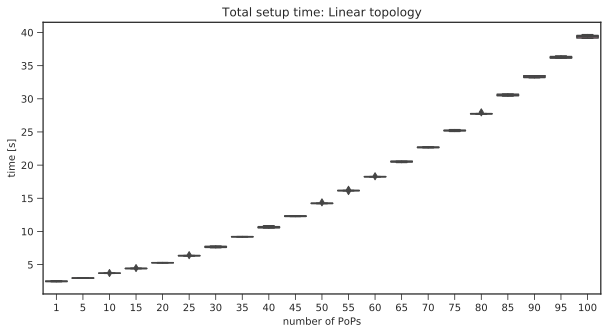

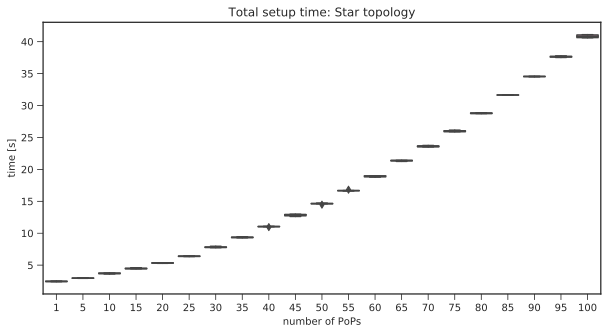

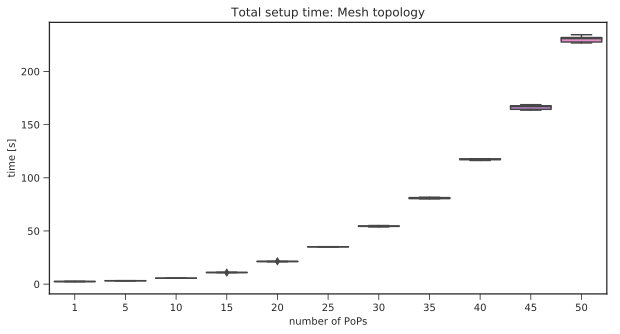

In [3]:
# read results
df = pd.read_pickle("data/2017-12-05-scaling_experiment.pkl")
#print(df)
df_line = df[df["topology"] == "line"]
df_star = df[df["topology"] == "star"]
df_mesh = df[df["topology"] == "mesh"]

df_single = df_line[df_line["n_pops"]== 1]
df_single = df_single.groupby("n_pops").mean()
print("AVG set up time for 1 PoP:")
print(df_single["time_total"])

#df_line = df_line.groupby(["n_pops"]).mean()
#print(df_line)

def box_plot(d, x="n_pops", y="time_total", title="title", path="plots/boxplot.png"):
    plt.figure()
    ax = sns.boxplot(data=d, x="n_pops", y="time_total")
    ax.set_title(title)
    ax.set_xlabel("number of PoPs")
    ax.set_ylabel("time [s]")
    fig = ax.get_figure()
    fig.savefig(path, dpi=300)
    
box_plot(df_line, title="Total setup time: Linear topology", path="plots/sdk_emu_boxplot_total_line.png")
box_plot(df_star, title="Total setup time: Star topology", path="plots/sdk_emu_boxplot_total_star.png")
box_plot(df_mesh, title="Total setup time: Mesh topology", path="plots/sdk_emu_boxplot_total_mesh.png")



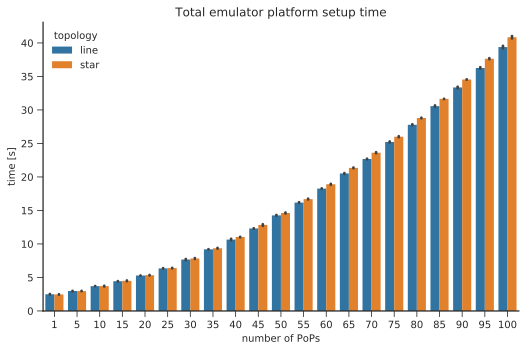

In [4]:
dff = df[df["topology"] != "mesh"].copy()
ax = sns.factorplot(x='n_pops',
                    y='time_total',
                    hue='topology',
                    data=dff,
                    kind="bar",
                    legend_out=False,
                    size=5.0,
                    aspect=1.5)
ax.set_xlabels("number of PoPs")
ax.set_ylabels("time [s]")
plt.title("Total emulator platform setup time")
plt.tight_layout()
ax.savefig("plots/sdk_emu_startup_compare_line_star.png", dpi=300)
ax.savefig("plots/sdk_emu_startup_compare_line_star.pdf", dpi=300)

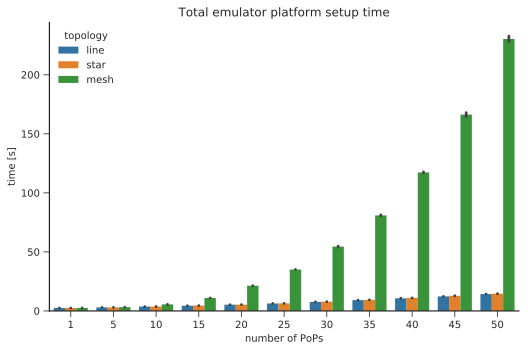

In [5]:
dff = df[df["n_pops"] < 51].copy()
ax = sns.factorplot(x='n_pops',
                    y='time_total',
                    hue='topology',
                    data=dff,
                    kind="bar",
                    legend_out=False,
                    size=5.0,
                    aspect=1.5)
ax.set_xlabels("number of PoPs")
ax.set_ylabels("time [s]")
plt.title("Total emulator platform setup time")
plt.tight_layout()
ax.savefig("plots/sdk_emu_startup_compare_mesh.png", dpi=300)
ax.savefig("plots/sdk_emu_startup_compare_mesh.pdf", dpi=300)

## KPI SDK.4 (Test platform scalability): Memory consumption

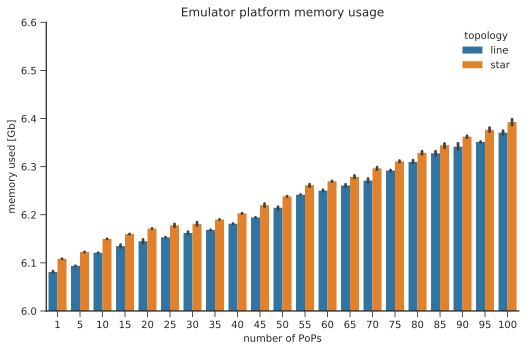

In [6]:
dff = df[df["topology"] != "mesh"].copy()
dff["mem_used"] = dff["mem_used"].map(lambda x: x / (1024 * 1024 * 1024))
#min_mem = dff["mem_used"].min() - 0.1
#dff["mem_used"] -= min_mem
ax = sns.factorplot(x='n_pops',
                    y='mem_used',
                    hue='topology',
                    data=dff,
                    kind="bar",
                    legend_out=False,
                    size=5.0,
                    aspect=1.5)
ax.set_xlabels("number of PoPs")
ax.set_ylabels("memory used [Gb]")
ax.set(ylim=(6, 6.6))
plt.title("Emulator platform memory usage")
plt.tight_layout()
ax.savefig("plots/sdk_emu_mem_compare_line_star.png", dpi=300)
ax.savefig("plots/sdk_emu_mem_compare_line_star.pdf", dpi=300)

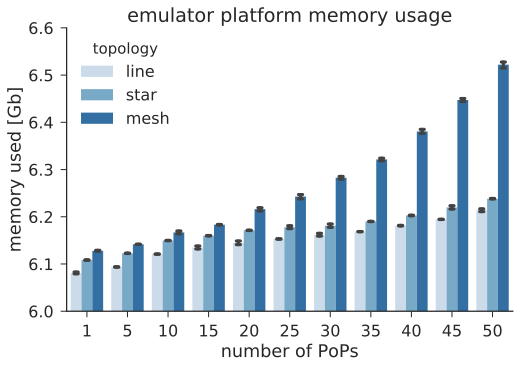

In [7]:
df = pd.read_pickle("data/2017-12-05-scaling_experiment.pkl")
sns.set(font_scale=1.6)
sns.set_style("ticks")
sns.set_palette("Blues", n_colors=3) # Greys, Blues_d

dff = df[df["n_pops"] < 51].copy()
dff["mem_used"] = dff["mem_used"].map(lambda x: x / (1024 * 1024 * 1024))
#min_mem = dff["mem_used"].min() - 0.1
#dff["mem_used"] -= min_mem

ax = sns.factorplot(x='n_pops',
                    y='mem_used',
                    hue='topology',
                    data=dff,
                    kind="bar",
                    legend_out=False,
                    size=5.5,
                    aspect=1.4,
                    capsize=.1)
ax.set_xlabels("number of PoPs")
ax.set_ylabels("memory used [Gb]")
ax.set(ylim=(6, 6.6))
plt.title("emulator platform memory usage")
plt.tight_layout()
ax.savefig("plots/sdk_emu_mem_compare_line_star.png", dpi=300)
ax.savefig("plots/sdk_emu_mem_compare_line_star.pdf", dpi=300)

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:593: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f2fcf2a4b00> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:593: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f2fd04ab828> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:593: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f2fd1870e10> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


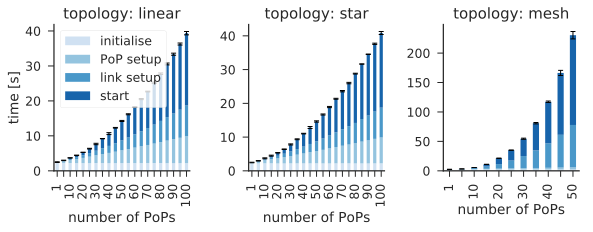

In [8]:
df = pd.read_pickle("data/2017-12-05-scaling_experiment.pkl")
sns.set(font_scale=1.25)
sns.set_style("ticks", {'legend.frameon': True})
sns.set_palette("Blues", n_colors=4) # Greys, Blues_d

lbl_env_boot = "initialise"
lbl_pop_create = "PoP setup"
lbl_link_create = "link setup"
lbl_topo_start = "start"

dff = df.rename(columns={"time_env_boot": lbl_env_boot,
                        "time_pop_create": lbl_pop_create,
                        "time_link_create": lbl_link_create,
                        "time_topo_start": lbl_topo_start})
df_line = dff[dff["topology"] == "line"].groupby(["n_pops"]).mean()
std_line = dff[dff["topology"] == "line"].groupby(["n_pops"])["time_total"].std().reset_index()
df_line = df_line[[lbl_env_boot, lbl_pop_create, lbl_link_create, lbl_topo_start]]
df_star = dff[dff["topology"] == "star"].groupby(["n_pops"]).mean()
std_star = dff[dff["topology"] == "star"].groupby(["n_pops"])["time_total"].std().reset_index()
df_star = df_star[[lbl_env_boot, lbl_pop_create, lbl_link_create, lbl_topo_start]]
df_mesh = dff[dff["topology"] == "mesh"].groupby(["n_pops"]).mean()
std_mesh = dff[dff["topology"] == "mesh"].groupby(["n_pops"])["time_total"].std().reset_index()
df_mesh = df_mesh[[lbl_env_boot, lbl_pop_create, lbl_link_create, lbl_topo_start]]

ticklabels = [1]
ticklabels += [i if (i % 10 == 0) else "" for i in range(5, 101, 5)]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False)
f.set_size_inches(8.5, 3.5)

# calculate totals for error bar plot overlay
sum_line = df_line[lbl_env_boot] + df_line[lbl_pop_create] + df_line[lbl_link_create] + df_line[lbl_topo_start]
sum_line = sum_line.reset_index()
sum_line = sum_line.drop("n_pops", axis=1)
sum_line = sum_line.rename(columns={0: "_nolegend_"})

sum_star = df_star[lbl_env_boot] + df_star[lbl_pop_create] + df_star[lbl_link_create] + df_star[lbl_topo_start]
sum_star = sum_star.reset_index()
sum_star = sum_star.drop("n_pops", axis=1)
sum_star = sum_star.rename(columns={0: "_nolegend_"})

sum_mesh = df_mesh[lbl_env_boot] + df_mesh[lbl_pop_create] + df_mesh[lbl_link_create] + df_mesh[lbl_topo_start]
sum_mesh = sum_mesh.reset_index()
sum_mesh = sum_mesh.drop("n_pops", axis=1)
sum_mesh = sum_mesh.rename(columns={0: "_nolegend_"})


df_line.plot(ax=ax1, kind="bar", stacked=True)
sum_line.plot(ax=ax1, yerr=list(std_line["time_total"]*2.0), linewidth=0.0, elinewidth=1.0, color="black", **{"capsize": 2.5, "capthick": 1.0})
df_star.plot.bar(ax=ax2, stacked=True)
sum_star.plot(ax=ax2, yerr=list(std_star["time_total"]*2.0), linewidth=0.0, elinewidth=1.0, color="black", **{"capsize": 2.5, "capthick": 1.0})
df_mesh.plot.bar(ax=ax3, stacked=True)
sum_mesh.plot(ax=ax3, yerr=list(std_mesh["time_total"]*2.0), linewidth=0.0, elinewidth=1.0, color="black", **{"capsize": 2.5, "capthick": 1.0})

sns.despine(ax=ax1, top=True, right=True, left=False, bottom=False)
sns.despine(ax=ax2, top=True, right=True, left=False, bottom=False)
sns.despine(ax=ax3, top=True, right=True, left=False, bottom=False)
ax1.set_xlabel("number of PoPs")
ax2.set_xlabel("number of PoPs")
ax3.set_xlabel("number of PoPs")
ax1.set_ylabel("time [s]")
#ax2.set_ylabel("time [s]")
#ax3.set_ylabel("time [s]")
ax1.legend().set_visible(True)
ax2.legend().set_visible(False)
ax3.legend().set_visible(False)
ax1.axes.xaxis.set_ticklabels(ticklabels)
ax2.axes.xaxis.set_ticklabels(ticklabels)
ax3.axes.xaxis.set_ticklabels(ticklabels)
ax1.set_title("topology: linear")
ax2.set_title("topology: star")
ax3.set_title("topology: mesh")
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=90)
f.tight_layout()
f.savefig("plots/sdk_emu_startup_breakdown.png", dpi=300)
f.savefig("plots/sdk_emu_startup_breakdown.pdf", dpi=300)

## KPI SDK.3 (Testing environment setup time): TopologyZoo Experiment

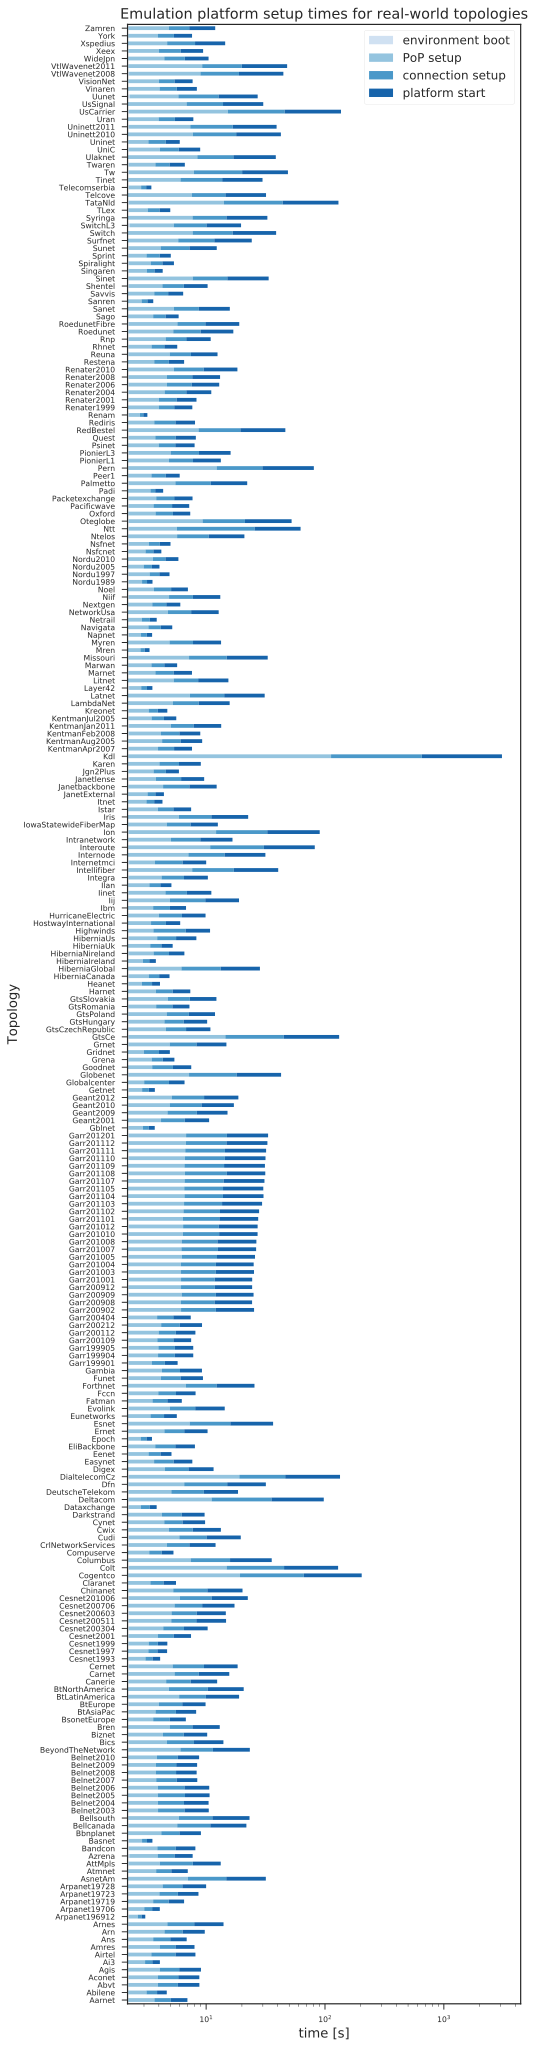

In [9]:
# read results
df2 = pd.read_pickle("data/2017-12-08-topologyzoo-5rep.pkl")
#print(df2["time_env_boot"])
lbl_env_boot = "environment boot"
lbl_pop_create = "PoP setup"
lbl_link_create = "connection setup"
lbl_topo_start = "platform start"

dff = df2.rename(columns={"time_env_boot": lbl_env_boot,
                        "time_pop_create": lbl_pop_create,
                        "time_link_create": lbl_link_create,
                        "time_topo_start": lbl_topo_start})
dff = dff.groupby(["topology"]).mean()
dff = dff[[lbl_env_boot, lbl_pop_create, lbl_link_create, lbl_topo_start]]

f, ax = plt.subplots(1, 1, sharey=False)
f.set_size_inches(8, 30)
#ax.set_yscale('log', nonposy='clip')
ax.set_xscale('log', nonposx='clip')
ax = dff.plot.barh(ax=ax, stacked=True, fontsize=8)
ax.set_xlabel("time [s]")
ax.set_ylabel("Topology")
ax.set_title("Emulation platform setup times for real-world topologies")
plt.tight_layout()
plt.savefig("plots/sdk_emu_startup_topologyzoo.png", dpi=300)
plt.savefig("plots/sdk_emu_startup_topologyzoo.pdf", dpi=300)



                 mem_available      mem_free  mem_percent     mem_total  \
topology                                                                  
Abilene           1.456580e+10  6.799889e+09        12.80  1.671238e+10   
Arpanet196912     1.460269e+10  6.941756e+09        12.60  1.671238e+10   
Arpanet19728      1.452935e+10  6.887178e+09        13.10  1.671238e+10   
AsnetAm           1.442225e+10  6.770723e+09        13.70  1.671238e+10   
Basnet            1.457084e+10  6.739866e+09        12.80  1.671238e+10   
Belnet2010        1.453871e+10  6.733243e+09        13.00  1.671238e+10   
BtAsiaPac         1.454047e+10  6.691241e+09        13.00  1.671238e+10   
BtEurope          1.453636e+10  6.823519e+09        13.00  1.671238e+10   
BtLatinAmerica    1.446939e+10  6.656322e+09        13.40  1.671238e+10   
BtNorthAmerica    1.446719e+10  6.589458e+09        13.40  1.671238e+10   
Chinanet          1.449196e+10  6.760160e+09        13.30  1.671238e+10   
DeutscheTelekom   1.44998

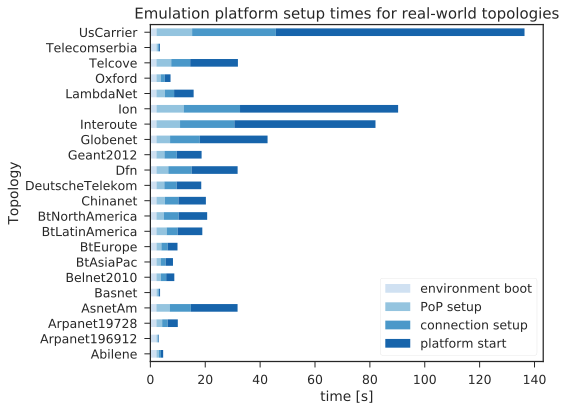

In [10]:
# read results
df2 = pd.read_pickle("data/2017-12-08-topologyzoo-5rep.pkl")
#print(df2["time_env_boot"])
filter_list = ["Abilene",
               "Arpanet196912",
               "Arpanet19728",
              "AsnetAm",
              "Basnet",
              "Belnet2010",
              "BtNorthAmerica",
              "BtLatinAmerica",
              "BtEurope",
              "BtAsiaPac",
              "Chinanet",
              "DeutscheTelekom",
              "Dfn",
              "Geant2012",
              "Globenet",
              "Interoute",
               "Ion",
              "LambdaNet",
               "Oxford",
               "Telcove",
               "Telecomserbia",
               "UsCarrier"
              ]
lbl_env_boot = "environment boot"
lbl_pop_create = "PoP setup"
lbl_link_create = "connection setup"
lbl_topo_start = "platform start"

dff = df2.rename(columns={"time_env_boot": lbl_env_boot,
                        "time_pop_create": lbl_pop_create,
                        "time_link_create": lbl_link_create,
                        "time_topo_start": lbl_topo_start})
dff = dff[dff["topology"].isin(filter_list)].groupby(["topology"]).mean()

print(dff)

dff = dff[[lbl_env_boot, lbl_pop_create, lbl_link_create, lbl_topo_start]]



f, ax = plt.subplots(1, 1, sharey=False)
f.set_size_inches(8, 6)
#ax.set_yscale('log', nonposy='clip')
#ax.set_xscale('log', nonposx='clip')
ax = dff.plot.barh(ax=ax, stacked=True)
ax.set_xlabel("time [s]")
ax.set_ylabel("Topology")
ax.set_title("Emulation platform setup times for real-world topologies")
plt.tight_layout()
plt.savefig("plots/sdk_emu_startup_topologyzoo_selected.png", dpi=300)
plt.savefig("plots/sdk_emu_startup_topologyzoo_selected.pdf", dpi=300)

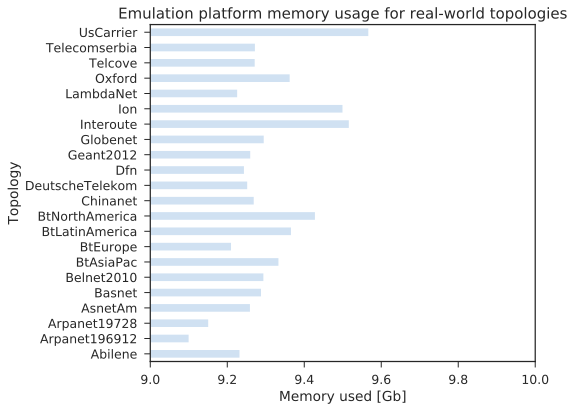

In [11]:
# read results
df2 = pd.read_pickle("data/2017-12-08-topologyzoo-5rep.pkl")
#print(df2["time_env_boot"])
filter_list = ["Abilene",
               "Arpanet196912",
               "Arpanet19728",
              "AsnetAm",
              "Basnet",
              "Belnet2010",
              "BtNorthAmerica",
              "BtLatinAmerica",
              "BtEurope",
              "BtAsiaPac",
              "Chinanet",
              "DeutscheTelekom",
              "Dfn",
              "Geant2012",
              "Globenet",
              "Interoute",
               "Ion",
              "LambdaNet",
               "Oxford",
               "Telcove",
               "Telecomserbia",
               "UsCarrier"
              ]

dff = df2[df2["topology"].isin(filter_list)].groupby(["topology"]).mean()
dff = dff[["mem_used"]]
dff["mem_used"] = dff["mem_used"].map(lambda x: x / (1024 * 1024 * 1024))

f, ax = plt.subplots(1, 1, sharey=False)
f.set_size_inches(8, 6)
#ax.set_yscale('log', nonposy='clip')
#ax.set_xscale('log', nonposx='clip')
ax = dff.plot.barh(ax=ax, stacked=False, legend=False)
ax.set_xlim(9, 10)
ax.set_xlabel("Memory used [Gb]")
ax.set_ylabel("Topology")
ax.set_title("Emulation platform memory usage for real-world topologies")
plt.tight_layout()
plt.savefig("plots/sdk_emu_memory_topologyzoo_selected.png", dpi=300)
plt.savefig("plots/sdk_emu_memory_topologyzoo_selected.pdf", dpi=300)

## KPI SDK.4 (Test platform scalability): Time required to start NS

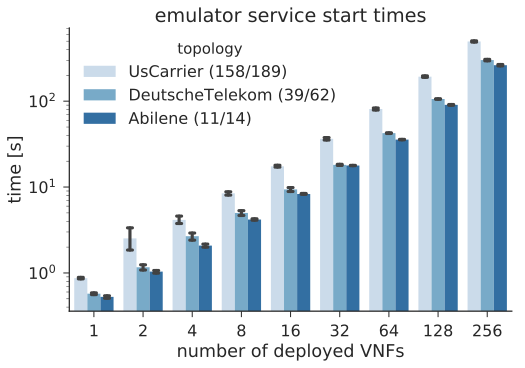

In [12]:
df = pd.read_pickle("data/2017-12-09-service-start-topozoo.pkl")

# add node and link numbers
data = df.to_dict('records')
for r in data:
    r["topology"] = "{} (${}$/${}$)".format(r["topology"], r["n_pops"], r["n_links"])
df = pd.DataFrame(data)

sns.set(font_scale=1.6)
sns.set_style("ticks")
sns.set_palette("Blues", n_colors=3) # Greys, Blues_d

ax = sns.factorplot(x='service_size',
                    y='time_service_start',
                    hue='topology',
                    data=df,
                    kind="bar",
                    legend_out=False,
                    size=5.5,
                    aspect=1.4,
                    capsize=.1)
ax.fig.get_axes()[0].set_yscale('log', nonposy='clip')
ax.set_xlabels("number of deployed VNFs")
ax.set_ylabels("time [s]")
plt.title("emulator service start times")
plt.tight_layout()
ax.savefig("plots/sdk_emu_service_start_time.png", dpi=300)
ax.savefig("plots/sdk_emu_service_start_time.pdf", dpi=300)

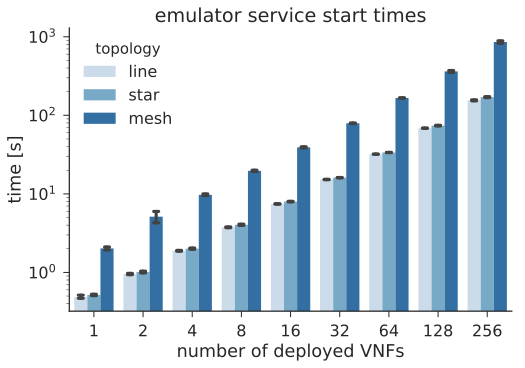

In [13]:
df = pd.read_pickle("data/2018-01-24-service-start-linear-star-mesh.pkl")

# add node and link numbers
#data = df.to_dict('records')
#for r in data:
#    r["topology"] = "{} (${}$/${}$)".format(r["topology"], r["n_pops"], r["n_links"])
#df = pd.DataFrame(data)

sns.set(font_scale=1.6)
sns.set_style("ticks")
sns.set_palette("Blues", n_colors=3) # Greys, Blues_d

ax = sns.factorplot(x='service_size',
                    y='time_service_start',
                    hue='topology',
                    data=df,
                    kind="bar",
                    legend_out=False,
                    size=5.5,
                    aspect=1.4,
                    capsize=.1)
ax.fig.get_axes()[0].set_yscale('log', nonposy='clip')
ax.set_xlabels("number of deployed VNFs")
ax.set_ylabels("time [s]")
plt.title("emulator service start times")
plt.tight_layout()
ax.savefig("plots/sdk_emu_service_start_time2.png", dpi=300)
ax.savefig("plots/sdk_emu_service_start_time2.pdf", dpi=300)

## OSM VIM Setup Time Experiment

** Attention: OSM VIM list has a bug since the SO does not support to set a query limit. RO uses 100 per default. As a results, services can only be started on the first 100 PoPs **

Hardcoded limit: https://osm.etsi.org/gitweb/?p=osm/RO.git;a=blob;f=osm_ro/httpserver.py;h=0497bbacc9b4efd387ddcb896aef6fa591c1d6b3;hb=HEAD Line 277


topology
Abilene             5.426412
Arpanet196912       1.931952
Arpanet19728       14.292059
AsnetAm            32.728793
Basnet              3.408610
Belnet2010         10.803726
BtAsiaPac           9.801535
BtEurope           11.696230
BtLatinAmerica     25.251240
BtNorthAmerica     17.929019
Chinanet           20.804445
DeutscheTelekom    19.251511
Dfn                28.896432
Geant2012          19.655747
Globenet           33.764177
Interoute          56.175535
Ion                65.074654
LambdaNet          20.652650
Oxford              9.764482
Telcove            36.574611
Telecomserbia       2.934924
UsCarrier          82.436495
Name: time_action, dtype: float64


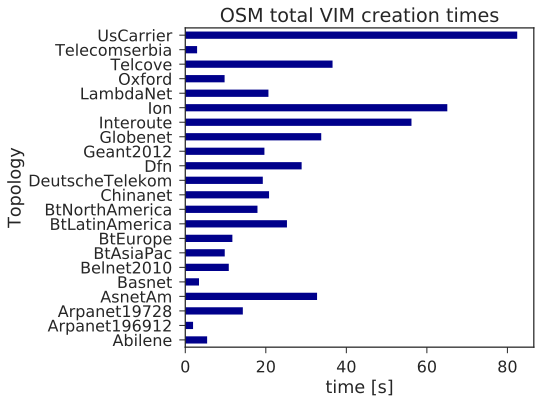

In [14]:
df1 = pd.read_pickle("data/2017-12-19-osm_zoo_setup_result.pkl")
df2 = pd.read_pickle("data/2017-12-19-osm_zoo_setup_osm_result.pkl")
df3 = df2[df2["action"] == "vim-create"].groupby(["topology"]).mean()
df4 = df2[df2["action"] == "vim-create"].groupby(["topology", "r_id"])['time_action'].sum()
df5 = df4.groupby(["topology"]).mean()
#print(df1)
#print(df4)
print(df5)

#df4 = df4[["time"]]

f, ax = plt.subplots(1, 1, sharey=False)
f.set_size_inches(8, 6)
#ax.set_yscale('log', nonposy='clip')
#ax.set_xscale('log', nonposx='clip')
ax = df5.plot.barh(ax=ax, stacked=False, legend=False, color="darkblue")
#ax.set_xlim(9, 10)
ax.set_xlabel("time [s]")
ax.set_ylabel("Topology")
ax.set_title("OSM total VIM creation times")
plt.tight_layout()
plt.savefig("plots/osm_emu_total_vim_create_time.png", dpi=300)
plt.savefig("plots/osm_emu_total_vim_create_time.pdf", dpi=300)


['config_id_x', 'mem_available_x', 'mem_free_x', 'mem_percent_x', 'mem_total_x', 'mem_used_x', 'n_links_x', 'n_pops_x', 'ns_running_x', 'service_size_x', 'osm vim-create', 'time_env_boot_x', 'time_link_create_x', 'time_pop_create_x', 'time_service_start_x', 'time_topo_start_x', 'time_total_x', 'vims_attached_x', 'config_id_y', 'mem_available_y', 'mem_free_y', 'mem_percent_y', 'mem_total_y', 'mem_used_y', 'n_links_y', 'n_pops_y', 'ns_running_y', 'r_id', 'service_size_y', 'time_action_y', 'emulator initialization', 'emulator link setup', 'emulator PoP setup', 'time_service_start_y', 'emulator start', 'time_total_y', 'vims_attached_y']


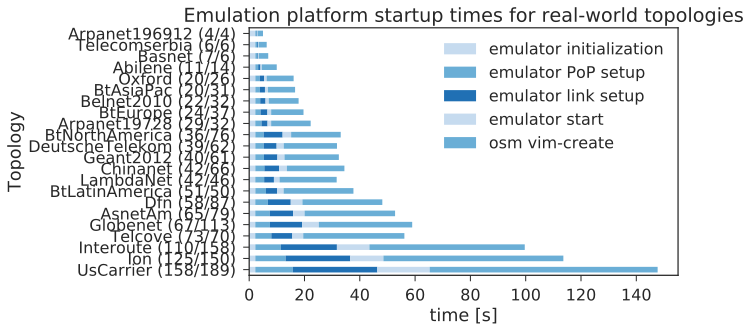

In [15]:
# read results
df = pd.read_pickle("data/2017-12-19-osm_zoo_setup_osm_result.pkl")

#
data = df.to_dict('records')
for r in data:
    r["topology"] = "{} (${}$/${}$)".format(r["topology"], r["n_pops"], r["n_links"])
df = pd.DataFrame(data)

# sum up vim-create commands
df_vim = df[df["action"] == "vim-create"].groupby(["topology", "r_id"]).sum()
df_vim = df_vim.groupby(["topology"]).mean()

lbl_env_boot = "emulator initialization"
lbl_pop_create = "emulator PoP setup"
lbl_link_create = "emulator link setup"
lbl_topo_start = "emulator start"
lbl_vim_create = "osm vim-create"

dff = df.groupby(["topology"]).mean()
# combine summed dataframe and simple dataframe
dff = pd.merge(df_vim, dff, how='outer', left_index=True, right_index=True)
dff = dff.rename(columns={"time_env_boot_y": lbl_env_boot,
                        "time_pop_create_y": lbl_pop_create,
                        "time_link_create_y": lbl_link_create,
                        "time_topo_start_y": lbl_topo_start,
                         "time_action_x": lbl_vim_create})

print(list(dff))
# sort
dff = dff.sort_values(by=["n_pops_y"], ascending=False)
# select columns to show
dff = dff[[lbl_env_boot, lbl_pop_create, lbl_link_create, lbl_topo_start, lbl_vim_create]]

f, ax = plt.subplots(1, 1, sharey=False)
f.set_size_inches(10, 5)
#ax.set_yscale('log', nonposy='clip')
#ax.set_xscale('log', nonposx='clip')
ax = dff.plot.barh(ax=ax, stacked=True)
ax.set_xlabel("time [s]")
ax.set_ylabel("Topology")
ax.set_title("Emulation platform startup times for real-world topologies")
plt.tight_layout()
plt.savefig("plots/osm_emu_total_vim_create_time_all.png", dpi=300)
plt.savefig("plots/osm_emu_total_vim_create_time_all.pdf", dpi=300)

### Double plot with normalized osm-create values

['config_id_x', 'mem_available_x', 'mem_free_x', 'mem_percent_x', 'mem_total_x', 'mem_used_x', 'n_links_x', 'n_pops_x', 'ns_running_x', 'service_size_x', 'osm vim-create', 'time_env_boot_x', 'time_link_create_x', 'time_pop_create_x', 'time_service_start_x', 'time_topo_start_x', 'time_total_x', 'vims_attached_x', 'config_id_y', 'mem_available_y', 'mem_free_y', 'mem_percent_y', 'mem_total_y', 'mem_used_y', 'n_links_y', 'n_pops_y', 'ns_running_y', 'r_id', 'service_size_y', 'time_action_y', 'emu. initialise', 'emu. link setup', 'emu. PoP setup', 'time_service_start_y', 'emu. start', 'time_total_y', 'vims_attached_y']


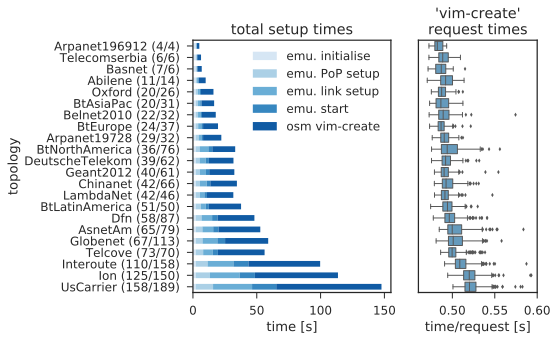

In [16]:
sns.set(font_scale=1.2)
sns.set_style("ticks")
sns.set_palette("Blues", n_colors=5) # Greys, Blues_d

# read results
df = pd.read_pickle("data/2017-12-19-osm_zoo_setup_osm_result.pkl")

#
data = df.to_dict('records')
for r in data:
    r["topology"] = "{} (${}$/${}$)".format(r["topology"], r["n_pops"], r["n_links"])
df = pd.DataFrame(data)

# sum up vim-create commands
df_vim = df[df["action"] == "vim-create"].groupby(["topology", "r_id"]).sum()
df_vim = df_vim.groupby(["topology"]).mean()

lbl_env_boot = "emu. initialise"
lbl_pop_create = "emu. PoP setup"
lbl_link_create = "emu. link setup"
lbl_topo_start = "emu. start"
lbl_vim_create = "osm vim-create"

dff = df.groupby(["topology"]).mean()
# combine summed dataframe and simple dataframe
dff = pd.merge(df_vim, dff, how='outer', left_index=True, right_index=True)
dff = dff.rename(columns={"time_env_boot_y": lbl_env_boot,
                        "time_pop_create_y": lbl_pop_create,
                        "time_link_create_y": lbl_link_create,
                        "time_topo_start_y": lbl_topo_start,
                         "time_action_x": lbl_vim_create})

print(list(dff))

# generate normalized osm vim-create values
df_vim2 = df.copy()
df_vim2 = df_vim2[df_vim2["action"] == "vim-create"]#.groupby(["topology", "r_id"]).mean()
#df_vim2["time_action"] /= df_vim2["n_pops"]

#df_vim2[df_vim2["action"] == "vim-create"].groupby(["topology", "r_id"]).mean()

#print(df_vim2)

# sort
dff = dff.sort_values(by=["n_pops_y"], ascending=False)
# select columns to show
dff = dff[[lbl_env_boot, lbl_pop_create, lbl_link_create, lbl_topo_start, lbl_vim_create]]

f, ax = plt.subplots(1, 2, sharey=False, gridspec_kw = {'width_ratios':[5, 3]})
f.set_size_inches(8, 5) # set width 7 for paper



for i in range(0, 2):
    #ax.set_yscale('log', nonposy='clip')
    #ax.set_xscale('log', nonposx='clip')
    if i == 0:
        dff.plot.barh(ax=ax[i], stacked=True)
        
        # fill with patterns for printing
        #bars = ax[i].patches
        #hatches = ["//", "\\", "**", "o", ".."] * 22
        #for b, h in zip(bars, hatches):
        #    b.set_hatch(h)
        
        ax[i].set_xlabel("time [s]")
        ax[i].set_ylabel("topology")
        ax[i].set_title("total setup times")
    else:  
        df_vim2 = df_vim2.sort_values(by=["n_pops"], ascending=True).copy()
        sns.boxplot(ax=ax[i], data=df_vim2, y="topology", x="time_action", orient="h", color="#569DCB", linewidth=1.0, fliersize=3.0)
        ax[i].set_title("'vim-create'\nrequest times")
        ax[i].set_xlabel("time/request [s]")
        ax[i].set_xlim(0.46, 0.60)
        ax[i].get_yaxis().set_visible(False)  # sharing Y axis does not work so we need to hide it!
f.tight_layout()
plt.savefig("plots/osm_emu_total_vim_create_time_all2.png", dpi=300)
plt.savefig("plots/osm_emu_total_vim_create_time_all2.pdf", dpi=300)

In [17]:
def plot_cdf(ax, d_in, col="time_action", *args, **kwargs):
    d_in = d_in.copy()
    samples = list(d_in[col].tolist())
    samples_sorted = np.sort(samples)
    yvals = np.arange(len(samples_sorted))/float(len(samples_sorted)) 
    ax.step(samples_sorted, yvals, *args, **kwargs)

def plot_cdf_binned(ax, d_in, bins=50, col="time_action", *args, **kwargs):
    d_in = d_in.copy()
    samples = list(d_in[col].tolist())
    counts, bins = np.histogram(samples, bins=bins)
    cdf = np.cumsum(counts)/np.sum(counts) 
    ax.plot(np.vstack((bins, np.roll(bins, -1))).T.flatten()[:-2],
            np.vstack((cdf, cdf)).T.flatten(),
            *args, **kwargs)

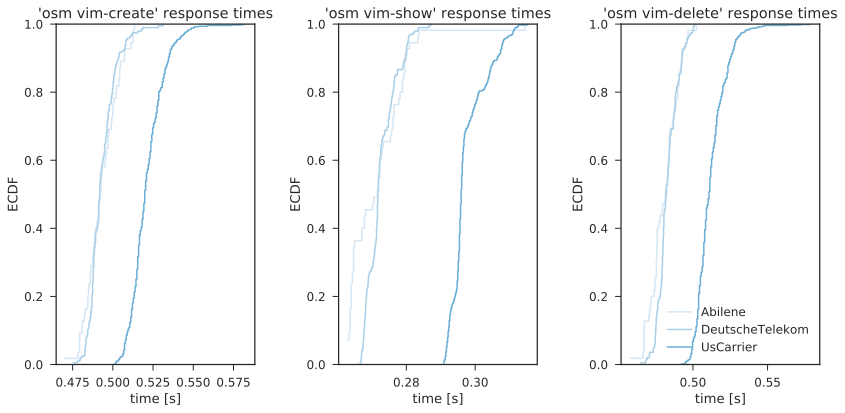

In [18]:
df1 = pd.read_pickle("data/2017-12-19-osm_zoo_setup_result.pkl")
df2 = pd.read_pickle("data/2017-12-19-osm_zoo_setup_osm_result.pkl")
df3 = df2[["action", "topology", "time_action"]]

topos = list(set(df3["topology"].values.tolist()))
topos = ['Abilene', 'DeutscheTelekom', 'UsCarrier']
actions = ["vim-create", "vim-show", "vim-delete"]
titles = ["'osm vim-create' response times", "'osm vim-show' response times", "'osm vim-delete' response times"]

f, axs = plt.subplots(1, 3, sharey=False)
f.set_size_inches(12, 6)

for i in range(0, 3):
    ax = axs[i]
    for t in topos:
        dff = df3[(df3["topology"] == t) & (df3["action"] == actions[i])]
        plot_cdf_binned(ax, dff, bins=150, label=t, lw=1.5)
    #ax.set_xlim(0.47, 0.57)
    ax.set_ylim(0, 1)
    ax.set_xlabel("time [s]")
    ax.set_ylabel("ECDF")
    ax.set_title(titles[i])
plt.legend()
plt.tight_layout()
plt.savefig("plots/osm_emu_cdf_vim_create_time.png", dpi=300)
plt.savefig("plots/osm_emu_cdf_vim_create_time.pdf", dpi=300)

## OSM Service Deployment

ping pong service on two different topologies

action==ns-create?
time_action?

it is in time_service_start
ns_running  

Check experiment code to get the deployment times of the services.
Scatter plot? X = n_services running, Y = total deployment time or deployment time of next service?


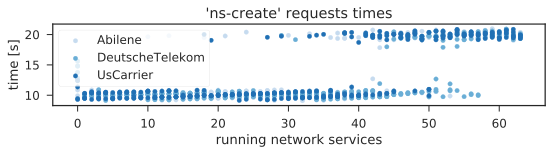

In [19]:
sns.set(font_scale=1.2)
sns.set_style("ticks", {'legend.frameon': True})
sns.set_palette("Blues", n_colors=3) # Greys, Blues_d

def load_multi_df():
    paths = ["data/2018-01-15-OsmService64/Abilene_r1.pkl",
            "data/2018-01-15-OsmService64/Abilene_r2.pkl",
            "data/2018-01-15-OsmService64/Abilene_r3.pkl",
            "data/2018-01-15-OsmService64/Abilene_r4.pkl",
            "data/2018-01-15-OsmService64/Abilene_r5.pkl",
            "data/2018-01-15-OsmService64/DeutscheTelekom_r1.pkl",
            "data/2018-01-15-OsmService64/DeutscheTelekom_r2.pkl",
            "data/2018-01-15-OsmService64/DeutscheTelekom_r3.pkl",
            "data/2018-01-15-OsmService64/DeutscheTelekom_r4.pkl",
            "data/2018-01-15-OsmService64/DeutscheTelekom_r5.pkl",
            "data/2018-01-15-OsmService64/UsCarrier_r1.pkl",
            "data/2018-01-15-OsmService64/UsCarrier_r2.pkl",
            "data/2018-01-15-OsmService64/UsCarrier_r3.pkl",
            "data/2018-01-15-OsmService64/UsCarrier_r4.pkl",
            "data/2018-01-15-OsmService64/UsCarrier_r5.pkl"]
    df = pd.concat([pd.read_pickle(p) for p in paths])
    return df

df = load_multi_df()

df1 = df[(df["action"] == "ns-create") & (df["topology"] == "Abilene")]
df2 = df[(df["action"] == "ns-create") & (df["topology"] == "DeutscheTelekom")]
df3 = df[(df["action"] == "ns-create") & (df["topology"] == "UsCarrier")]

#print(df3)
#print(df1[["action", "ns_running", "time_action"]])
palette = itertools.cycle(sns.color_palette())
f, ax = plt.subplots(1, 1, sharey=False)
f.set_size_inches(8, 2.4)
df1.plot.scatter(ax=ax, x="ns_running", y="time_action", label="Abilene", color=next(palette))
df2.plot.scatter(ax=ax, x="ns_running", y="time_action", label="DeutscheTelekom", color=next(palette))
df3.plot.scatter(ax=ax, x="ns_running", y="time_action", label="UsCarrier", color=next(palette))
ax.set_title("'ns-create' requests times")
ax.set_xlabel("running network services")
ax.set_ylabel("time [s]")
plt.tight_layout()
plt.savefig("plots/osm_emu_scatter_ns_create_time.png", dpi=300)
plt.savefig("plots/osm_emu_scatter_ns_create_time.pdf", dpi=300)

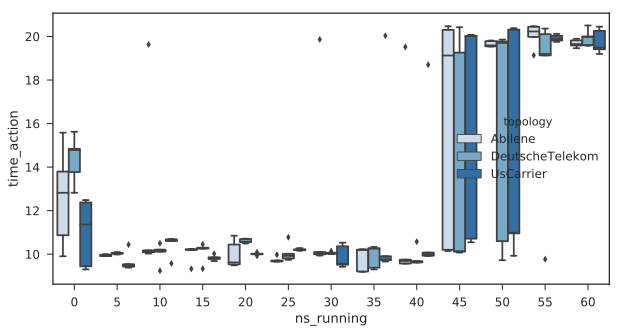

In [20]:
sns.set(font_scale=1.2)
sns.set_style("ticks")
sns.set_palette("Blues", n_colors=3) # Greys, Blues_d
df = load_multi_df()
df = df[(df["action"] == "ns-create")]
df = df[(df["ns_running"].isin([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]))]

f, ax = plt.subplots(1, 1, sharey=False)
f.set_size_inches(10, 5)
ax = sns.boxplot(ax=ax, x="ns_running", y="time_action", hue="topology", data=df)

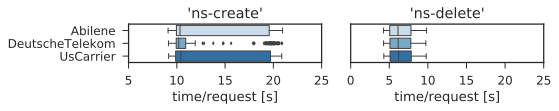

In [21]:
sns.set(font_scale=1.2)
sns.set_style("ticks")
sns.set_palette("Blues", n_colors=3) # Greys, Blues_d

df1 = pd.read_pickle("data/2017-12-22-osm_zoo_service_abilene_64_osm_result.pkl")
df2 = pd.read_pickle("data/2017-12-22-osm_zoo_service_deutschetelekom_64_osm_result.pkl")

df = load_multi_df()

# add node and link numbers
#data = df.to_dict('records')
#for r in data:
#    r["topology"] = "{} (${}$/${}$)".format(r["topology"], r["n_pops"], r["n_links"])
#df = pd.DataFrame(data)

#print(df)
#print(df[["time_service_start"]])

dfc = df[df["action"] == "ns-create"]
dfd = df[df["action"] == "ns-delete"]

#print(dfd)

f, axs = plt.subplots(1, 2, sharey=True)
f.set_size_inches(8, 1.8)
sns.boxplot(ax=axs[0], data=dfc, y="topology", x="time_action", orient="h", linewidth=1.0, fliersize=3.0)
axs[0].set_title("'ns-create'")
axs[0].set_xlabel("time/request [s]")
axs[0].set_ylabel("")
axs[0].set_xlim(5, 25)
axs[0].get_yaxis().set_visible(True)  
sns.boxplot(ax=axs[1], data=dfd, y="topology", x="time_action", orient="h", linewidth=1.0, fliersize=3.0)
axs[1].set_title("'ns-delete'")
axs[1].set_xlabel("time/request [s]")
axs[1].set_ylabel("")
axs[1].set_xlim(0, 25)
axs[1].get_yaxis().set_visible(False)  
#f.subplots_adjust(bottom = 0)
#f.subplots_adjust(top = 1)
#f.subplots_adjust(right = 1)
#f.subplots_adjust(left = -1)
plt.tight_layout()
plt.savefig("plots/osm_emu_box_ns_create_delete_time.png", dpi=300)
plt.savefig("plots/osm_emu_box_ns_create_delete_time.pdf", dpi=300)